In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import random_split
from torchtext.vocab import build_vocab_from_iterator
from sklearn.model_selection import train_test_split
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cpu')

In [2]:
tkDF = pd.read_csv('data/경상도.csv')

In [3]:
tkDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212906 entries, 0 to 212905
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사투리     212906 non-null  object
 1   표준어     212906 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [4]:
tkDF.head(20)

,사투리,표준어
0,지난달 그 지난달에는 그의 거기가 어딘지 내가 그곳을 말을 모르는데 그 정신이 들에...,지난달 그 지난달에는 그의 거기가 어딘지 내가 그곳을 말을 모르는데 그 정신이 들에...
1,힘들어요 농사 짓는 거는 힘들고 요즘은 기계가 좋아 가지고 농사 짓기가 수월하지만도...,힘들어요 농사 짓는 거는 힘들고 요즘은 기계가 좋아 가지고 농사 짓기가 수월하지만 ...
2,더운 삼계탕 겉은 거는 더울 때 묵을 때는 좋지예 좋은데 묵고 나면 사람이 속도 편...,더운 삼계탕 같은 거는 더울 때 먹을 때는 좋지요 좋은데 먹고 나면 사람이 속도 편...
3,장 보러 가다가 비가 마이 오길래 밭두럼 엉개질까봐 밭에 가보는 길이시더,장 보러 가다가 비가 많이 오길래 밭두렁 무너질까봐 밭에 가보는 길입니다
4,비가 오니까 집에 어데 누전이 되는가 그건 한번 되더라고예 그래 정전될 때는 인자 ...,비가 오니까 집에 어디 누전이 되는가 그건 한번 되더라구요 그래 정전될 때는 인제 ...
5,우리 집에서 불편한 점은 없는데 아 그기 저기 기차역이 지나가니까 시끄러워 가지고 ...,우리 집에서 불편한 점은 없는데 아 거기 저기 기차역이 지나가니까 시끄러워 가지고 ...
6,부추는 부산 말로 정구지 아이가 정구지는 지짐을 해 먹으면은 제일 좋은데 그게 비가...,부추는 부산 말로 부추 아닌가요 부추는 전을 해 먹으면은 제일 좋은데 그게 비가 좀...
7,이 구두 하나만 계속 신고 다니니께 인자 굽이 딿아서 갈아야 되겠네,이 구두 하나만 계속 신고 다니니까 이제 굽이 닳아서 갈아야 되겠네
8,부추 우리 말로 정구지라고 하는데 정구지는 딱 보면은 부침개 해가지고 정구지 전 구...,부추 우리 말로 부추라고 하는데 부추는 딱 보면은 부침개 해가지고 부추 전 구워가지...
9,요즘 몸에 좋은 거는 별 보조식품은 없는데 인제 주로 버섯 같은 거 좀 많이 먹고 ...,요즘 몸에 좋은 거는 별 보조식품은 없는데 인제 주로 버섯 같은 거 좀 많이 먹고 ...


In [42]:
tkDF.duplicated().sum()

117795

In [5]:
tkDF = pd.melt(tkDF)

In [6]:
tkDF = tkDF.sample(frac=1).reset_index(drop=True)

In [7]:
tkDF['variable'].values

array(['사투리', '사투리', '사투리', ..., '사투리', '표준어', '표준어'], dtype=object)

In [8]:
tkDF

,variable,value
0,사투리,여기는 옥수갱이가 잘 된다. 카던디 옥수갱이 말고는 무신 농새를 마이 짓습니까
1,사투리,상량하만 주인하고 일꾼들이 음식도 농 갈라 묵고 술도 마시고 그랬어예
2,사투리,논두렁에 전선에 늘어져 있거나 정전이 됐을 때 두깨비집을 무짜로 만지만 위험합니더
3,사투리,육회 무슨 그 장만할라꼬 작 자 가가 좋은 게기를 사야지 안 그라모 맛이 없어예
4,표준어,응 어제 저녁에는 된장하고 호박잎 쪄가지고 호박잎하고 먹고 멸치 있는 거 하고 그냥...
...,...,...
425807,표준어,옛날에는 아버지가 농사 지을 때 보면 소 달구지 해가지고 벼를 막 싣고 이렇게 달달...
425808,표준어,한국 사람은 머니 머니해도 김치가 제일 중요한데 물김치 백김치 그다음에 고춧가루 넣...
425809,사투리,가재미는 잡자마자 싱싱할 때 막 써리가 물회로 먹으면 얼마나 맛있다고요
425810,표준어,갑자기 숨이 가쁘고 가슴이 답답하다고 할 때는 사람을 바로 눕히고 단추를 풀어야 합니다


In [9]:
import string

tkDF['value'] = tkDF['value'].replace(r'[{}]'.format(string.punctuation), '', regex=True)

In [10]:
tkDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425812 entries, 0 to 425811
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   variable  425812 non-null  object
 1   value     425812 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB


In [11]:
class CustomDataset(Dataset):
    def __init__(self, xdata, ydata):
        super().__init__()
        self.text = list(xdata.values) if isinstance(xdata, pd.DataFrame) else list(xdata)
        self.label = [1 if value == '사투리' else 0 for value in ydata.values] if isinstance(ydata, pd.DataFrame) else [1 if value == '사투리' else 0 for value in ydata]

    def __len__(self): 
        return len(self.text)
    
    def __getitem__(self, idx):
        return self.label[idx], self.text[idx]


In [12]:
tkDS = CustomDataset(tkDF.value,tkDF.variable)
len(tkDS)

425812

In [13]:
X_train, X_test, y_train, y_test = train_test_split(tkDF.value,tkDF.variable  , test_size=0.2, random_state=42, stratify=tkDF.variable)

In [14]:
trainDS = CustomDataset(X_train, y_train)
valDS = CustomDataset(X_test, y_test)

In [15]:
pd.DataFrame(trainDS.label).value_counts()

0    170325
1    170324
Name: count, dtype: int64

In [16]:
pd.DataFrame(valDS.label).value_counts()

1    42582
0    42581
Name: count, dtype: int64

In [17]:
# train_length = int(0.8 * len(tkDS))
# val_length = len(tkDS) - train_length
# trainDS, valDS = random_split(tkDS, [train_length, val_length])

In [18]:
# 토큰 관련 특별 문자
unk = '<UNK>'
pad = '<PAD>'

In [19]:
from konlpy.tag import Mecab
mecab = Mecab()

In [20]:
# 한글 불용어 제거 # 어근 제거는 안함 - 사투리와 표준어 구별 사라짐
def torkenizer(text):
    with open('data/hangul_stopword.txt', 'r', encoding='utf-8') as f:
        stopword_h = {line.strip() for line in f.readlines()} 
    token = mecab.morphs(text)
    token = [word for word in token if word not in stopword_h] 
    return token


In [21]:
def yield_tokens(data_iter):
    for label, text in data_iter:
        yield torkenizer(text)

In [22]:
# !pip3 install mecab-ko-msvc mecab-ko-dic-msvc

In [23]:
VOCAB = build_vocab_from_iterator(yield_tokens(trainDS), specials=[unk, pad], special_first=True)

VOCAB.set_default_index(VOCAB[unk])

In [40]:
import pickle

# 저장할 파일 이름
filename = "vocab_tk.pkl"

# 어휘 사전 저장
with open(filename, "wb") as f:
    pickle.dump(VOCAB, f)

In [25]:
VOCAB(['마'])

[132]

In [26]:
# 텍스트 > 정수 인코딩
text_pipeline = lambda x: VOCAB(torkenizer(x))

In [27]:
# 인코딩
token2id = {label: id for id, label in enumerate(VOCAB.get_itos())}
# 디코딩
id2token = {id: label for id, label in enumerate(VOCAB.get_itos())}

In [28]:
# 배치 크기 만큼 데이터셋 반환 함수
def collate_batch(batch):

    label_list, text_list, offsets = [], [], [0] 

    for (_label, _text) in batch:

        label_list.append(_label)

        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)

        offsets.append(processed_text.size(0))

    # 텐서화 진행
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0) # 누적값 -> 전체 갯수
    text_list = torch.cat(text_list)
    
    return label_list.to(DEVICE), text_list.to(DEVICE), offsets.to(DEVICE)

In [29]:
BATCH_SIZE = 16384
trainDL = DataLoader(trainDS, batch_size=BATCH_SIZE, collate_fn=collate_batch)
testDL = DataLoader(valDS, batch_size=BATCH_SIZE, collate_fn=collate_batch)

In [30]:
NUM_CLASSE = 1
VOCAB_SIZE = len(VOCAB)
NUM_LAYER = 1
print(f'NUM_CLASSES: {NUM_CLASSE} VOCAB_SIZE: {VOCAB_SIZE}')

NUM_CLASSES: 1 VOCAB_SIZE: 47603


In [31]:
class TextModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_class):
        super(TextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim, sparse=False)
        self.rnn = nn.GRU(embedding_dim, hidden_size, NUM_LAYER, batch_first=True)
        self.dropout = nn.Dropout(p=0.2)  # 드롭아웃 레이어 추가
        self.fc = nn.Linear(hidden_size, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        output, hidden = self.rnn(embedded)
        output = self.dropout(output) 
        return self.fc(output)


In [32]:
HIDDEN_SIZE = 3
EMBEDDING_DIM = 64
VOCAB_SIZE = len(VOCAB)
EPOCHS = 30
LR = 0.01

In [33]:
# 학습 관련 인스턴스
MODEL = TextModel(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_SIZE, NUM_CLASSE).to(DEVICE)

CRITERION = nn.BCEWithLogitsLoss()
OPTIMIZER = torch.optim.Adam(MODEL.parameters(), lr=LR)
SCHEDULER = torch.optim.lr_scheduler.ReduceLROnPlateau(OPTIMIZER)

In [34]:
from torchmetrics.classification import BinaryF1Score

In [35]:
def train(model, DL, loss_fn, optimizer):
    model.train()
    lossList = []

    f1 = BinaryF1Score()

    for label, text, offset in DL: 
        label = label.to(DEVICE)
        text = text.to(DEVICE)  
        offset = offset.to(DEVICE)
        
        output = model(text, offset)

        target = label.unsqueeze(1).float()  # [배치 크기, 1] 형태로 변환
        
        loss = loss_fn(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        lossList.append(loss.item())
        
        f1(output, target)

    train_loss = np.mean(lossList)
    train_f1 = f1.compute().cpu().item()

    print(f'[Train loss] ==> {train_loss:.4f}    [Train F1 Score] ==> {train_f1:4f}')
    return train_loss, train_f1

In [36]:
def evaluate(model, DL, loss_fn):
    model.eval()
    losses = []
    
    f1 = BinaryF1Score()

    with torch.no_grad():
        for label, text, offset in DL: 
            label = label.to(DEVICE)
            text = text.to(DEVICE)
            offset = offset.to(DEVICE)
            
            output = model(text, offset)

            
            target = label.unsqueeze(1).float()  # [배치 크기, 1] 형태로 변환
            
            loss = loss_fn(output, target)
            losses.append(loss.item())

            f1(output, target)
        
    val_loss = np.mean(losses)
    val_f1 = f1.compute().cpu().item()

    print(f'[Valid loss] ==> {val_loss:4f}    [Valid F1 Score] ==> {val_f1:4f}')
    return val_loss, val_f1

In [37]:
def predict(model, text, text_pipeline):
    with torch.no_grad():
        # 토큰화 > 정수 변환 > 텐서
        text = torch.tensor(text_pipeline(text), dtype=torch.int64).to(DEVICE)
        text = text.unsqueeze(0)
        offsets = torch.tensor([0]).DEVICE       
        predicted_label = model(text, offsets)
        return predicted_label.argmax(1).item() + 1

In [38]:
def grahp(train_report,val_report):
    fig, ax1 = plt.subplots()  # fig는 그래프 객체

    # 손실 그래프 그리기
    ax1.plot(train_report[0], label='Train Loss', color='red')
    ax1.plot(val_report[0], label='Validation Loss', color='orange')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')
    
    # 정확도 그래프 그리기
    ax2 = ax1.twinx()
    ax2.plot(train_report[1], label='Train F1 Score', color='blue')
    ax2.plot(val_report[1], label='Validation F1 Score', color='green')
    ax2.set_ylabel('F1 Score')
    ax2.set_xlabel('Epoch')
    ax2.tick_params(axis='y')
    ax2.legend(loc='upper right')
    
    plt.xlabel('Epoch')  # 전체 그래프의 x축 라벨 설정
    plt.title('Train & Validation Scores')
    plt.show()

In [41]:
# 학습 및 검증 진행
train_ = [[],[]]
test_ = [[],[]]

min_loss = float('inf')

for epoch in range(1, EPOCHS+1):
    print(f'[Epoch {epoch}/{EPOCHS}]')
    train_loss, train_f1 = train(MODEL, trainDL, CRITERION, OPTIMIZER)
    val_loss, val_f1 = evaluate(MODEL, testDL, CRITERION)

    train_[0].append(train_loss)
    train_[1].append(train_f1)
    test_[0].append(val_loss)
    test_[1].append(val_f1)

    SCHEDULER.step(val_loss)

    if min_loss > val_loss:
        min_loss = val_loss
        torch.save(MODEL, 'model_tk.pht')
    if SCHEDULER.num_bad_epochs >= SCHEDULER.patience:
        print(f'Early Stopping at {epoch}')
        break

[Epoch 1/30]


KeyboardInterrupt: 

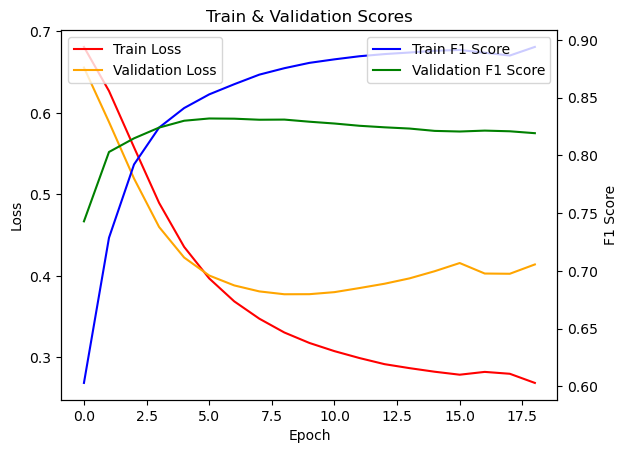

In [ ]:
grahp(train_,test_)